In [1]:
import pandas
import sklearn.preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 

# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pandas.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pandas.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = sklearn.preprocessing.scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values


#from sklearn.preprocessing import MinMaxScaler
#sc_X = MinMaxScaler()
#X = sc_X.fit_transform(X)

#Split data into training and test test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.2, random_state = 0)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



def evaluate(clf):    
    y_hat=clf.predict(X_test)
    probs = clf.predict_proba(X_test)  
    probs = probs[:, 1]  
    cm = confusion_matrix(y_test, y_hat)
    print('comfunfusion matrix: ')
    print(cm)
    auc = roc_auc_score(y_test, probs)
    print('auc :',auc)
    fpr, tpr, thresholds = roc_curve(y_test, probs)   
    plot_roc_curve(fpr, tpr)

comfunfusion matrix: 
[[681 112]
 [ 53  59]]
auc : 0.7859394703657


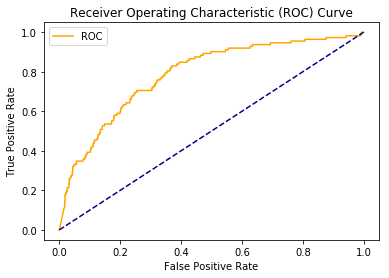

In [3]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
evaluate(clf)

comfunfusion matrix: 
[[788   5]
 [ 94  18]]
auc : 0.717652224824356


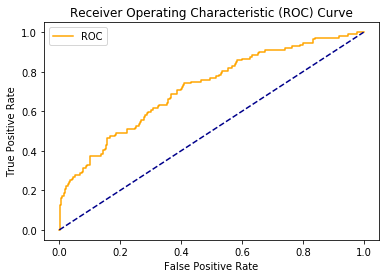

In [5]:
#Split data into training and test test
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
Xn = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xn, t, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
evaluate(clf)

C:\Users\ronwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfunfusion matrix: 
[[579 214]
 [ 17  95]]
auc : 0.8716109709962169


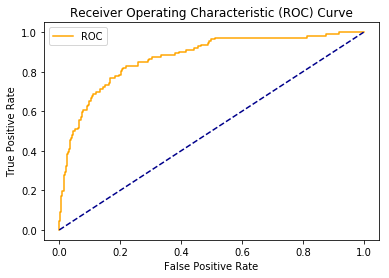

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False)
clf.fit(X_train, y_train)
evaluate(clf)

C:\Users\ronwa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


comfunfusion matrix: 
[[780  13]
 [ 85  27]]
auc : 0.8587022608539003


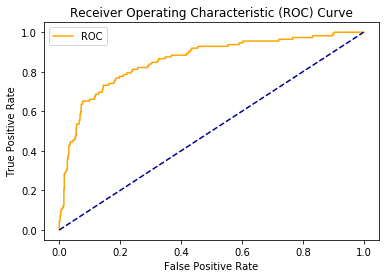

comfunfusion matrix: 
[[788   5]
 [ 95  17]]
auc : 0.8195482795892632


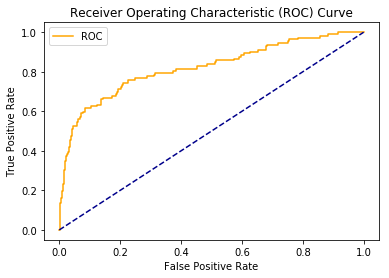

C:\Users\ronwa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


comfunfusion matrix: 
[[773  20]
 [ 80  32]]
auc : 0.8367692758061611


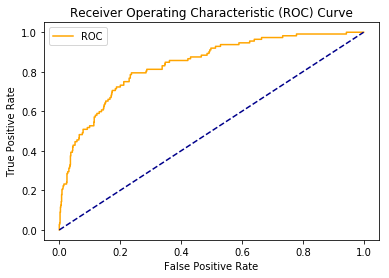

C:\Users\ronwa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


comfunfusion matrix: 
[[761  32]
 [ 80  32]]
auc : 0.7137227526571789


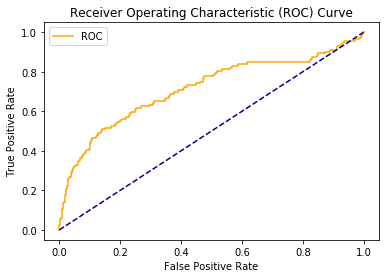

In [7]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train)
evaluate(clf)
from sklearn.svm import SVC
clf=SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)
evaluate(clf)
from sklearn.svm import SVC
clf=SVC(kernel='poly',probability=True)
clf.fit(X_train, y_train)
evaluate(clf)
from sklearn.svm import SVC
clf=SVC(kernel='sigmoid',probability=True)
clf.fit(X_train, y_train)
evaluate(clf)

In [8]:
#comparing auc of above results, Logistic regression looks to be a good classifier for this training data set
class_zero=0

for i in y_train:
    if i==0:
        class_zero=class_zero+1
    
print("total example: ",len(y_train))
print("total example with class zero :",class_zero)

all_zero_acc=class_zero/len(y_train)
print("accuracy with predicting every class as zero :",all_zero_acc)

probs=[0 for i in y_train]
auc = roc_auc_score(y_train, probs)
print("auc when simply predicting class zero:",auc)

total example:  3616
total example with class zero : 3207
accuracy with predicting every class as zero : 0.886891592920354
auc when simply predicting class zero: 0.5


In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

class_zero=0

for i in y_train:
    if i==0:
        class_zero=class_zero+1
    
print("total example: ",len(y_train))
print("total example with class zero :",class_zero)


total example:  6414
total example with class zero : 3207


In [ ]:
#run cells 3-7
#hardly any change in auc was noticed 